# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime as dt 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude 
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    geocoding_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}'
    

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        geo_res = requests.get(geocoding_url).json()
        lat = geo_res[0]['lat']
        lon = geo_res[0]['lon']
        city_url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=metric'
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | loa janan
Processing Record 2 of Set 1 | atafu village
City not found. Skipping...
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | praia da vitoria
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | junin de los andes
Processing Record 10 of Set 1 | douglas
Processing Record 11 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | ta`u
City not found. Skipping...
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | bargaal
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | tofol
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,loa janan,-0.5876,117.0887,25.04,93,100,0.79,ID,1686134120
1,puerto natales,-51.7262,-72.5060,3.34,72,40,6.59,CL,1686134121
2,papatowai,-46.5619,169.4708,4.52,82,17,2.05,NZ,1686134121
3,praia da vitoria,38.7392,-27.1563,16.51,82,97,9.16,PT,1686134122
4,udachny,66.4118,112.2517,11.21,58,95,8.68,RU,1686134123


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loa janan,-0.5876,117.0887,25.04,93,100,0.79,ID,1686134120
1,puerto natales,-51.7262,-72.5060,3.34,72,40,6.59,CL,1686134121
2,papatowai,-46.5619,169.4708,4.52,82,17,2.05,NZ,1686134121
3,praia da vitoria,38.7392,-27.1563,16.51,82,97,9.16,PT,1686134122
4,udachny,66.4118,112.2517,11.21,58,95,8.68,RU,1686134123


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

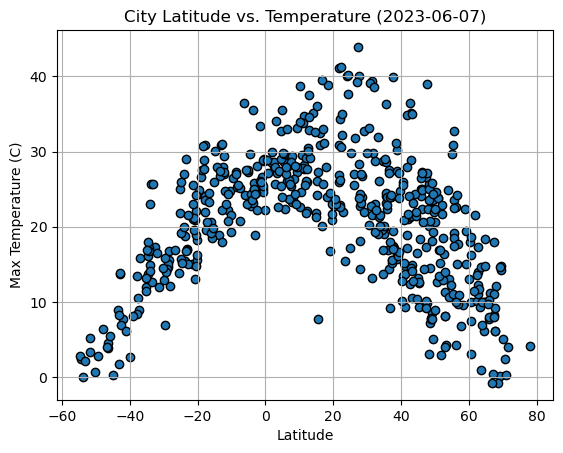

In [10]:
# Build scatter plot for latitude vs. temperature
local_time = time.strftime("%Y-%m-%d", time.localtime())
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Max Temp', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Max Temperature (C)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Temperature ({local_time})')
ax.grid(visible=True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

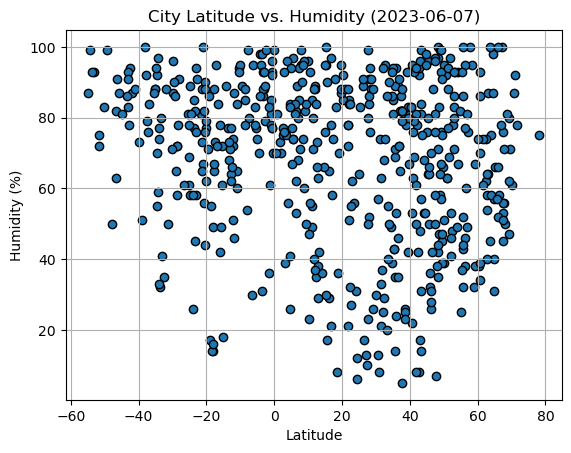

In [26]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Humidity', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Humidity ({local_time})')
ax.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

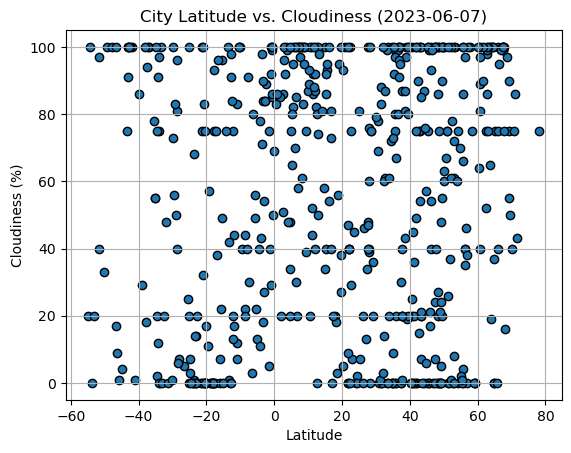

In [27]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Cloudiness', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Cloudiness ({local_time})')
ax.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

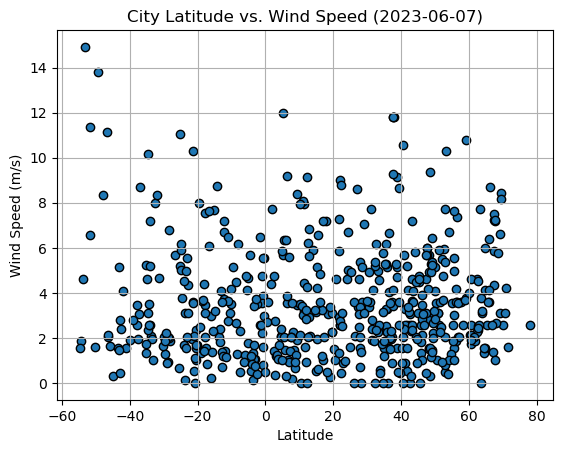

In [28]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Wind Speed', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Wind Speed ({local_time})')
ax.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), 'r')

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,praia da vitoria,38.7392,-27.1563,16.51,82,97,9.16,PT,1686134122
4,udachny,66.4118,112.2517,11.21,58,95,8.68,RU,1686134123
6,bethel,60.7922,-161.7558,10.02,93,100,2.57,US,1686134124
8,douglas,54.1498,-4.4779,12.98,67,75,6.69,IM,1686134125
10,tiksi,71.6366,128.8685,3.99,78,43,1.60,RU,1686134127


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loa janan,-0.5876,117.0887,25.04,93,100,0.79,ID,1686134120
1,puerto natales,-51.7262,-72.5060,3.34,72,40,6.59,CL,1686134121
2,papatowai,-46.5619,169.4708,4.52,82,17,2.05,NZ,1686134121
5,port-aux-francais,-49.3498,70.2200,2.77,99,100,13.81,TF,1686134123
7,junin de los andes,-39.9509,-71.0709,2.64,73,86,1.90,AR,1686134124


###  Temperature vs. Latitude Linear Regression Plot

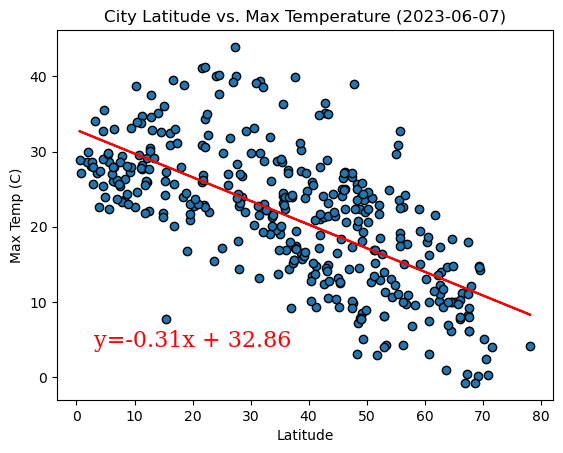

In [29]:
# Linear regression on Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Max Temp', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Max Temp (C)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Max Temperature ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Max Temp']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Max Temp']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Max Temp']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(3, 4, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)

# Show plot
plt.show()

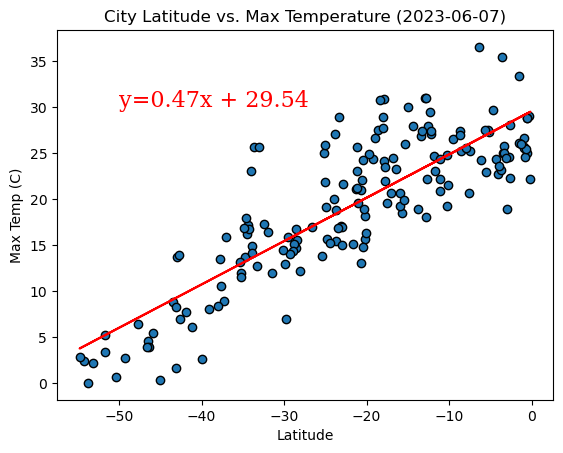

In [30]:
# Linear regression on Southern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Max Temp', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Max Temp (C)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Max Temperature ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Max Temp']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Max Temp']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Max Temp']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 30, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)

# Show plot
plt.show()

**Discussion about the linear relationship:**

The northern hemisphere has a negative relationship between Latitude and Max Temperature (C) of -.31 degrees celsius per degree Latitude with an average Max Temperature of 32.86 degrees celsius at zero Latitude for cities in the sample. The rate of change is a drop of .31 (C) for each degree Latitude starting at zero degrees Latitude moving north. This confirms expectations that the temperature becomes colder as you move north from the equator.

The southern hemisphere has a positive relationship between Latitude and Max Temperature (C) of .47 degrees celsius per degree Latitude with an average Max Temperature of 29.54 degrees celsius at zero Latitude for cities in the sample. The rate of change is a drop of .47 (C) for each degree Latitude starting at zero degrees Latitude moving south. This confirms expectations that the temperature becomes colder as you move south from the equator.

### Humidity vs. Latitude Linear Regression Plot


The r-value is: -0.040982239405009016


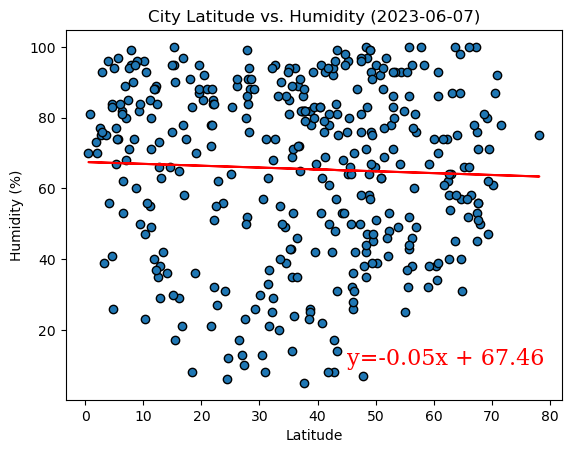

In [31]:
# Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Humidity', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Humidity ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Humidity']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Humidity']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Humidity']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(45, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

The r-value is: -0.04849542482605086


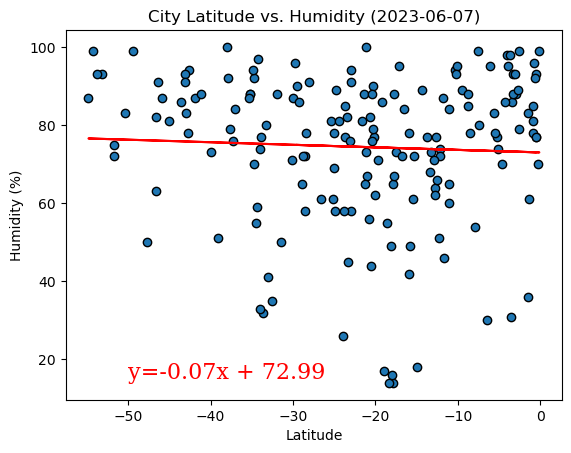

In [32]:
# Southern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Humidity', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Humidity ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Humidity']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Humidity']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Humidity']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 15, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

**Discussion about the linear relationship:**

The northern hemisphere has a negative relationship between Latitude and Max Temperature (C) of -.31 degrees celsius per degree Latitude with an average Max Temperature of 32.86 degrees celsius at zero Latitude for cities in the sample. The rate of change is a drop of .31 (C) for each degree Latitude starting at zero degrees Latitude moving north. This supports expectations that the temperature becomes colder as you move north from the equator.

The southern hemisphere has a positive relationship between Latitude and Max Temperature (C) of .47 degrees celsius per degree Latitude with an average Max Temperature of 29.54 degrees celsius at zero Latitude for cities in the sample. The rate of change is a drop of .47 (C) for each degree Latitude starting at zero degrees Latitude moving south. This supports expectations that the temperature becomes colder as you move south from the equator.

### Cloudiness vs. Latitude Linear Regression Plot


The r-value is: -0.06697100753118669


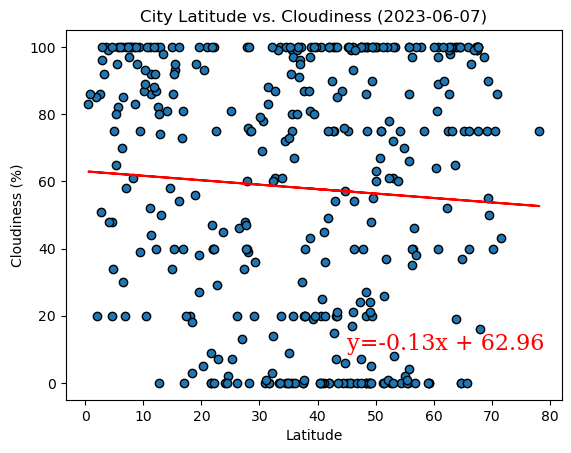

In [33]:
# Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Cloudiness', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Cloudiness ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Cloudiness']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Cloudiness']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Cloudiness']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(45, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

The r-value is: 0.004770795392398606


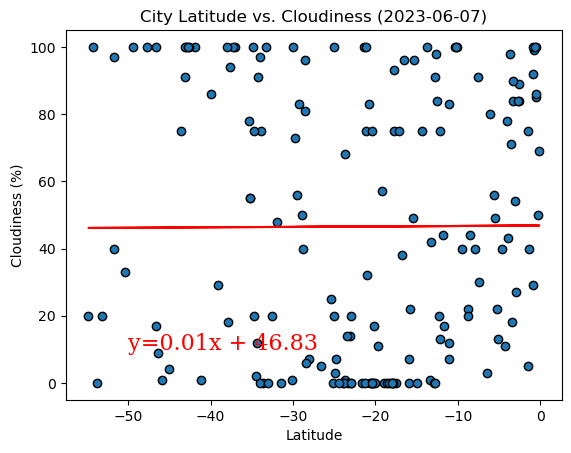

In [34]:
# Southern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Cloudiness', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Cloudiness ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Cloudiness']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Cloudiness']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Cloudiness']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

**Discussion about the linear relationship:**

The northern hemisphere has a negative relationship between Latitude and Cloudiness (%) of -.13 percent Cloudiness per degree Latitude with an average percent Cloudiness of 62.96 percent Cloudiness at zero Latitude for cities in the sample. The rate of change is a drop of .13 percent Cloudiness for each degree Latitude starting at zero degrees Latitude moving north. This supports expectations that the percent Cloudiness decreases as you move north from the equator.

The southern hemisphere has very weak to no correlation between Latitude and Cloudiness (%) because the slope almost remains flat with .01 percent Cloudiness per degree Latitude with an average percent Cloudiness of 46.83 percent Cloudiness at zero Latitude for cities in the sample. The rate of change is a drop of .01 percent Cloudiness for each degree Latitude starting at zero degrees Latitude moving south. This does not support expectations that the percent Cloudiness decreases as you move south from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.061279491738864454


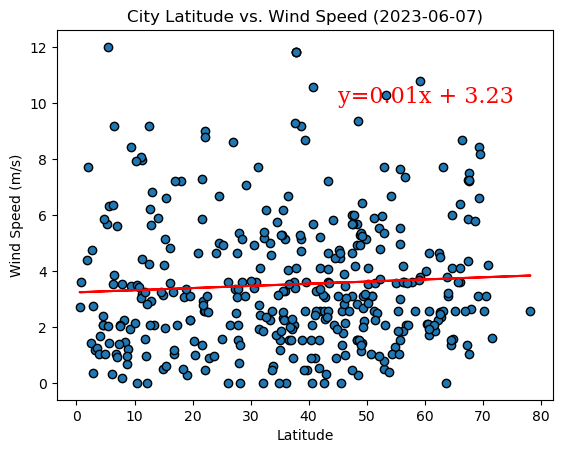

In [35]:
# Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Wind Speed', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Wind Speed ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Wind Speed']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Wind Speed']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Wind Speed']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(45, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

The r-value is: -0.2172071898334583


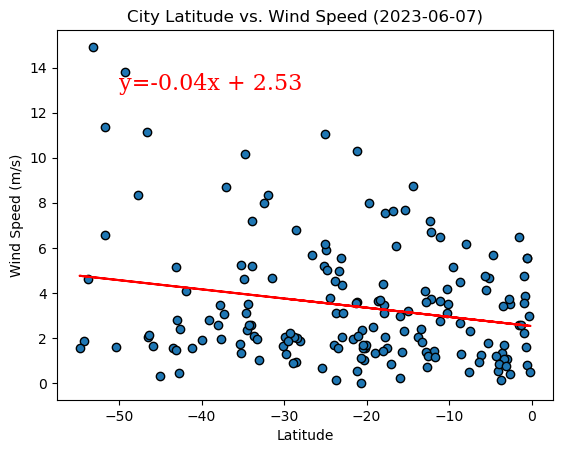

In [36]:
# Southern Hemisphere
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Wind Speed', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Wind Speed ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Wind Speed']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Wind Speed']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Wind Speed']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 13, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

**Discussion about the linear relationship:**

The northern hemisphere has very weak to no correlation between Latitude and Wind Speed because the slope almost remains flat with .01 Wind Speed per degree Latitude with an average Wind Speed of 3.23 Wind Speed at zero Latitude for cities in the sample. The rate of change is an increase of .01 Wind Speed for each degree Latitude starting at zero degrees Latitude moving north. This does not support expectations that the Wind Speed increases as you move north from the equator.

The northern hemisphere has a weak relationship between Latitude and Wind Speed of -.04 Wind Speed per degree Latitude with an average Wind Speed of 2.53 Wind Speed at zero Latitude for cities in the sample. The rate of change is an increase of .04 Wind Speed for each degree Latitude starting at zero degrees Latitude moving south. This does not support expectations that the Wind Speed increases as you move south from the equator.